# Basic MNIST

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

C:\Users\tmdwh\.conda\envs\vir_project2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tmdwh\.conda\envs\vir_project2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\tmdwh\.conda\envs\vir_project2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [32]:
##Data preparation ##
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [33]:
# 28 x 28 image 60000개
x_train.shape

(60000, 28, 28)

5

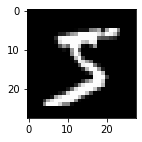

In [34]:
plt.figure(figsize=(2, 2)) #그래프의 크기조절
plt.imshow(x_train[0],cmap='gray')
y_train[0]

In [35]:
x_train,x_test = x_train.reshape(-1,28*28), x_test.reshape(-1,28*28)
y_train,y_test = tf.keras.utils.to_categorical(y_train),tf.keras.utils.to_categorical(y_test)
# output의 형태를 맞춰주기 위해서 바꿔줌
x_train.shape

(60000, 784)

In [36]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [37]:
x_train.max()

255

In [38]:
x_train, x_test = x_train/255.0, x_test/255.0

In [39]:
## model make ##
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,activation = 'relu', input_shape= (28*28,)))
# (784,) -> 784행 열은 모두가 60000개가 들어간다
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(x_train, y_train, batch_size = 64, epochs= 10, validation_data = (x_test,y_test) ) #64개씩 돌릴 거다

Epoch 1/10
938/938 [==============================] - 15s 15ms/step - loss: 0.3425 - accuracy: 0.9039 - val_loss: 0.1919 - val_accuracy: 0.9452
Epoch 2/10
938/938 [==============================] - 14s 14ms/step - loss: 0.1709 - accuracy: 0.9509 - val_loss: 0.1478 - val_accuracy: 0.9547
Epoch 3/10
938/938 [==============================] - 13s 14ms/step - loss: 0.1282 - accuracy: 0.9623 - val_loss: 0.1250 - val_accuracy: 0.9632
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.1020 - accuracy: 0.9700 - val_loss: 0.1108 - val_accuracy: 0.9671
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0841 - accuracy: 0.9752 - val_loss: 0.0984 - val_accuracy: 0.9702
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0713 - accuracy: 0.9791 - val_loss: 0.0944 - val_accuracy: 0.9718
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0627 - accuracy: 0.9814 - val_loss: 0.0970 - val_accuracy: 0.971

In [44]:
test_prediction = model.predict(x_test[0].reshape(-1,784))

In [45]:
test_prediction

array([[1.2008404e-08, 2.9525642e-12, 1.1728593e-05, 5.2164623e-04,
        4.6261342e-11, 4.1706727e-09, 1.8270933e-15, 9.9946266e-01,
        1.7440663e-06, 2.1933586e-06]], dtype=float32)

# Basic CNN with MNIST

In [3]:
##Data preparation ##
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
## Normalization ##
x_train, x_test = x_train/255.0, x_test/255.0

##categorical
y_train, y_test = tf.keras.utils.to_categorical(y_train),tf.keras.utils.to_categorical(y_test)

In [5]:
## making model ##
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28,28,1),input_shape = (28,28)), # 28,28,1 인 이유 공간은 만들어놓기 위해
    tf.keras.layers.Conv2D(16,kernel_size = (3,3),padding = 'VALID', activation= 'relu'), #26x26x16
    tf.keras.layers.Conv2D(32,kernel_size = (3,3),padding = 'VALID', activation= 'relu'), #24x24x32
    tf.keras.layers.MaxPool2D((2,2)), #12x12x32
    tf.keras.layers.Conv2D(64,kernel_size = (3,3),padding = 'VALID', activation= 'relu'), #10x10x64
    tf.keras.layers.Flatten(), #input -> 6400개
    tf.keras.layers.Dense(1024,activation='relu'), #6400 -> 1024
    tf.keras.layers.Dense(10,activation='softmax'), #1024 -> 10
])

In [6]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6

In [ ]:
## Training ##
model.fit(x_train,y_train, batch_size = 32, epochs = 2, validation_data =(x_test,y_test))

Epoch 1/2


In [ ]:
test_prediction = model.predict(x_test[0].reshape(1,28,28))